# SA #2

**Samson, Justine Aizel D.**


 #### *Historical Prices Dataset*

# Dataset Loading

In [4]:
# prompt: get data or get acess to my drive /content/drive

from google.colab import drive
drive.mount('/content/drive')

# Now you can access your Google Drive files using the path '/content/drive/My Drive/'
# For example, to list the files in your Google Drive:
#!ls '/content/drive/My Drive/'

# Upload the dataset
from google.colab import files

# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Time Series/HistoricalPrices.csv')

# Display the first few rows of the dataset
data.head()

Mounted at /content/drive


,Date,Open,High,Low,Close
0,04/03/07,6366.11,6366.1,6318.8,6366.11
1,04/02/07,6315.53,6342.2,6293.9,6315.53
2,03/30/07,6308.03,6330.0,6291.1,6308.03
3,03/29/07,6324.18,6334.7,6267.2,6324.18
4,03/28/07,6267.21,6304.9,6250.1,6267.21


In [5]:
!pip install arch

In [6]:
# Strip leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify the updated column names
print(data.columns)


# Calculate log returns
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


# 1. Calculate the returns of the FTSE100 index

In [7]:
# Import libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Time Series/HistoricalPrices.csv')

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data.set_index('Date', inplace=True)

# Calculate log returns
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data = data.dropna()  # Drop missing values from shift

# 2. Create graphs/charts and conduct tests to verify GARCH model applicability

**Return Series Visualization:**

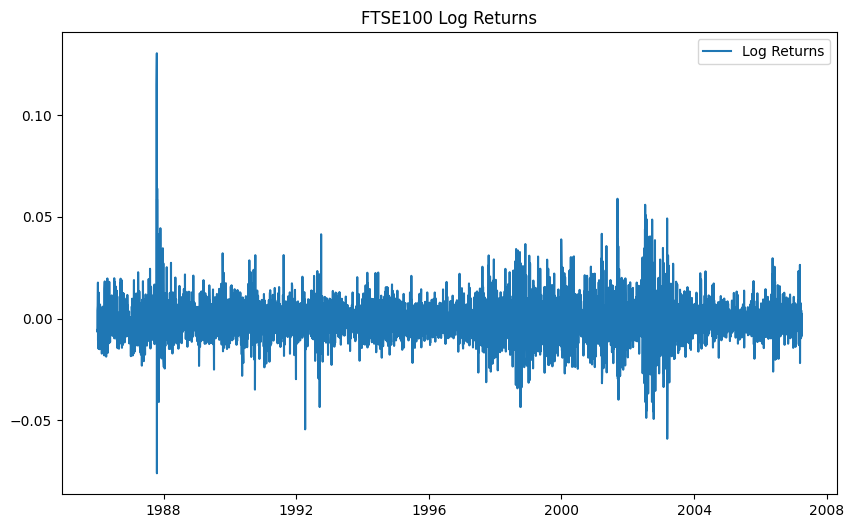

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], label="Log Returns")
plt.title("FTSE100 Log Returns")
plt.legend()
plt.show()


**ACF and PACF for Squared Returns:**


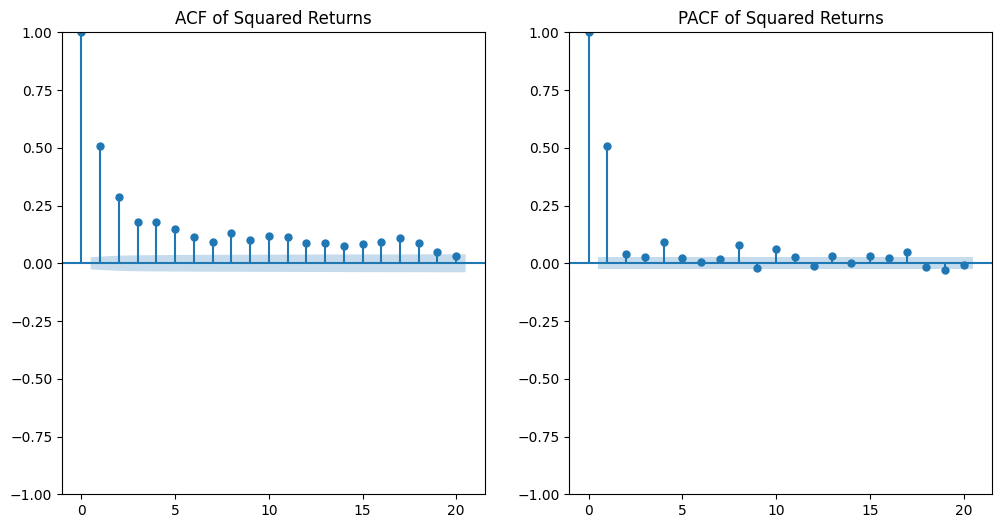

In [9]:
# Plot ACF and PACF of squared returns
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Returns'] ** 2, lags=20, ax=plt.gca(), title="ACF of Squared Returns")
plt.subplot(122)
plot_pacf(data['Returns'] ** 2, lags=20, ax=plt.gca(), title="PACF of Squared Returns")
plt.show()

**Stationarity Test (ADF)**

In [10]:
# Perform Augmented Dickey-Fuller Test
adf_test = adfuller(data['Returns'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] <= 0.05:
    print("The returns series is stationary.")
else:
    print("The returns series is not stationary.")

ADF Statistic: -23.565678993850867
p-value: 0.0
The returns series is stationary.


# 3. List down all probable GARCH models

In [11]:
!pip install arch

In [12]:
import warnings
from arch import arch_model

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Fit GARCH Models
print("Fitting GARCH Models:")
models = {}
criteria = {}

for p, q in [(1, 1), (1, 2), (2, 1), (2, 2)]:
    model = arch_model(data['Returns'], vol='Garch', p=p, q=q, dist='Normal', rescale=False)  # Set rescale=False
    fitted_model = model.fit(disp="off")
    models[f"GARCH({p},{q})"] = fitted_model
    criteria[f"GARCH({p},{q})"] = fitted_model.aic
    print(f"GARCH({p},{q}): AIC = {fitted_model.aic}")

# Find the best model based on AIC
best_model = min(criteria, key=criteria.get)
print(f"Best GARCH model: {best_model}")

# Summarize the best model
print(models[best_model].summary())


Fitting GARCH Models:
GARCH(1,1): AIC = -35514.28365673985
GARCH(1,2): AIC = -35238.3242691789
GARCH(2,1): AIC = -35509.017808136596
GARCH(2,2): AIC = -35487.74204993533
Best GARCH model: GARCH(1,1)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                17761.1
Distribution:                  Normal   AIC:                          -35514.3
Method:            Maximum Likelihood   BIC:                          -35487.9
                                        No. Observations:                 5380
Date:                Fri, Dec 13 2024   Df Residuals:                     5379
Time:                        08:20:06   Df Model:                            1
                                   Mean Model                                  
          

# 4. GARCH Model and Justification



The best GARCH model for this data is GARCH(1,1), as determined by the lowest AIC value (-35514.3) among all tested models. The AIC (Akaike Information Criterion) is a widely used metric for model selection, with lower values indicating a better fit while penalizing model complexity.

### Justification:
* Performance Metric (AIC): The GARCH(1,1) model has the lowest AIC compared to GARCH(1,2), GARCH(2,1), and GARCH(2,2). This suggests it provides the best trade-off between goodness of fit and simplicity.

* Parsimonious Model: The GARCH(1,1) model is simpler than models with higher orders (e.g., GARCH(2,2)) while still effectively capturing the volatility dynamics in the data.

* Statistical Significance: All parameters in the GARCH(1,1) model, including ω, α1, and β1, are highly significant (p-values < 0.001), confirming their relevance in explaining the volatility.

* Model Stability: The sum of α1 + β1 = 0.98, which is less than 1, ensures that the model is stable and consistent with the properties of financial time series.

Given these points, the GARCH(1,1) model is both statistically robust and computationally efficient, making it the optimal choice for modeling the volatility in this dataset.
